<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/4_4_%ED%96%89%EB%A0%AC%EC%9D%98_%EB%AF%B8%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 기본 셋팅

In [ ]:
import numpy as np

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (15,9)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


### 1) 행렬미분

1. 행렬미분(matrix differentiation) : 행렬을 입력이나 출력으로 가지는 함수를 미분하는 것 = 편미분(partial derivative)


### 2) 스칼라를 벡터로 미분하는 경우

- 데이터 분석에서는 함수의 출력변수가 스칼라이고 입력변수 $x$가 벡터인 다변수 함수를 사용하는 경우 多 → 편미분도 $\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \cdots$ 등으로 여러 개가 존재함 

- 그레디언트 벡터(gradient vector) : 스칼라를 벡터로 미분하는 경우인 열벡터인 결과 ($\nabla f$)
> $$
\begin{align}
\nabla f = 
\frac{\partial f}{\partial {x}} =
\begin{bmatrix}
\dfrac{\partial f}{\partial x_1}\\
\dfrac{\partial f}{\partial x_2}\\
\vdots\\
\dfrac{\partial f}{\partial x_N}\\
\end{bmatrix}
\end{align}
$$

#### 예제

- 다변수 함수 
> $$
\begin{align}
f(x, y) = 2x^2 + 6xy + 7y^2 - 26x - 54y + 107
\end{align}
$$

- 위 함수에 대한 그레디언트 벡터
> $$
\begin{align}
\nabla f = 
\begin{bmatrix}
\dfrac{\partial f}{\partial x}\\
\dfrac{\partial f}{\partial y}\\
\end{bmatrix} =
\begin{bmatrix}
4x + 6y - 26\\
6x + 14y - 54\\
\end{bmatrix}
\end{align}
$$


#### 연습 문제 4.4.1 

다음 함수의 그레디언트 벡터를 구하라

(1)
$$
\begin{align}
f(x, y, z) = x + y + z
\end{align}
$$
> 답 : $$
\nabla f = 
\begin{bmatrix}
1\\
1\\
1
\end{bmatrix}
$$


(2)
$$
\begin{align}
f(x, y, z) = xyz
\end{align}
$$

> 답 : $$
\nabla f = 
\begin{bmatrix}
yz\\
xz\\
xy
\end{bmatrix}
$$

#### 연습 문제 4.4.2



$$
\begin{align}
\nabla f = 
\begin{bmatrix}
4x + 6y - 26\\
6x + 14y - 54\\
\end{bmatrix}
\end{align}
$$

- 위의 함수에 대해서 $x, y$가 다음 위치일 때 그레디언트 벡터의 값을 구하고 평면상에 화살표로 나타내라.

(1) $x=7, y=1$
> 답 : $$
\nabla f = 
\begin{bmatrix}
8\\
2\\
\end{bmatrix}
$$

(2) $x=2, y=1$
> 답 : $$
\nabla f = 
\begin{bmatrix}
-12\\
-28\\
\end{bmatrix}
$$

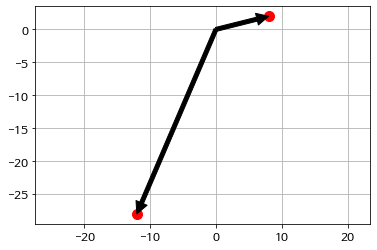

In [ ]:
def g(x, y):
    return (4 * x + 6 * y - 26, 6 * x + 14 * y - 54)

black = {'facecolor' : 'black'}

g1 = g(7,1)
g2 = g(2,1)

plt.plot(0,0, ms=10)
plt.plot(g1[0], g1[1], 'ro', ms=10)
plt.annotate('', xy=g1, xytext=(0,0), arrowprops=black)
plt.plot(g2[0], g2[1], 'ro', ms=10)
plt.annotate('', xy=g2, xytext=(0,0), arrowprops=black)

plt.axis('equal')
plt.show()

#### 예제

- 아래 함수의 그레디언트 벡터를 표시한 퀴버플롯

$$
\begin{align}
2x^2 + 6xy + 7y^2 - 26x - 54y + 107
\end{align}
$$



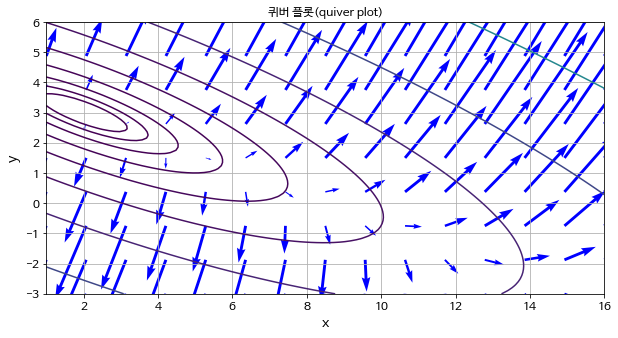

In [ ]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(1, 16, 100)
yy = np.linspace(-3, 6, 90)
X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(1, 16, 15)
yy2 = np.linspace(-3, 6, 9)
X2, Y2 = np.meshgrid(xx2, yy2)
GX = gx(X2, Y2)
GY = gy(X2, Y2)
plt.figure(figsize=(10, 5))
plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10))
plt.quiver(X2, Y2, GX, GY, color='blue', scale=400, minshaft=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title("퀴버 플롯(quiver plot)")
plt.show()

#### 연습 문제 4.4.3

- 아래의 함수로 표현되는 지형을 상상하라. 이 지형의 (14, 4) 지점에 공을 두었다면 어떠한 경로로 공이 움직일지 경로를 그려라.

$$
\begin{align}
2x^2 + 6xy + 7y^2 - 26x - 54y + 107
\end{align}
$$

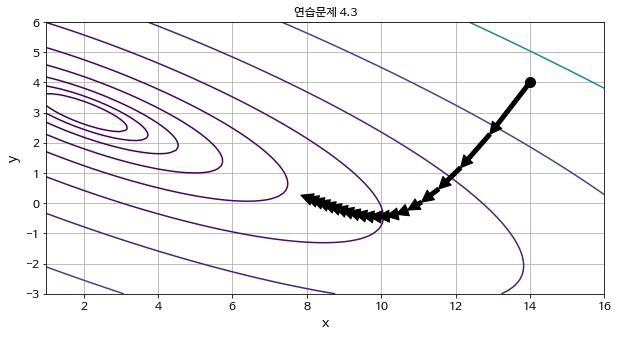

In [ ]:
def f(x, y):
    return 2 * x**2 + 6 * x * y + 7 * y**2 - 26 * x - 54 * y + 107

xx = np.linspace(1, 16, 100)
yy = np.linspace(-3, 6, 90)
X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

def gx(x, y):
    return 4 * x + 6 * y - 26

def gy(x, y):
    return 6 * x + 14 * y - 54

xx2 = np.linspace(1, 16, 15)
yy2 = np.linspace(-3, 6, 9)
X2, Y2 = np.meshgrid(xx2, yy2)
GX = gx(X2, Y2)
GY = gy(X2, Y2)
plt.figure(figsize=(10, 5))
plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10))

x0 = (14, 4)
plt.plot(x0[0], x0[1], 'ko', ms=10)

for i in range(20):
  g = np.array((gx(x0[0], x0[1]), gy(x0[0], x0[1])))
  x_next = x0 - 0.02 * g
  plt.annotate('', xy=x_next, xytext=x0, arrowprops=black)
  x0 = x_next
  
plt.xlabel('x')
plt.ylabel('y')
plt.title("연습문제 4.3")
plt.show()


- 퀴버플롯에서 그레디언트 벡터의 특징

1. 그레디언트 벡터의 크기 = 기울기. 즉 벡터의 크기 ↑ → 함수 곡면의 기울기 ↑
2. 그레디언트 벡터의 방향 = 함수 곡면의 기울기가 가장 큰 방향. 즉 단위 길이당 함수값(높이)이 가장 크게 증가하는 방향을 가리킴
3. 그레디언트 벡터의 방향 = 등고선(isoline)의 방향과 직교

- 어떤 점 $x_0$에서 다른 점 $x$로 이동하면서 함수 값이 얼마나 변하는지는 테일러 전개를 써서 근사 가능
> $$ 
\begin{align}
f(x) - f(x_0) = \Delta f \approx  \nabla f(x_0)^T (x - x_0) 
\end{align}
$$
> - 변화의 방향 $x - x_0$가 그레디언트 벡터와 같은 방향일 때 $\Delta f$가 가장 커짐

- 등고선은 $f(x)$의 값이 일정한 $x$의 집합이므로 다음과 같은 방정식으로 표현할 수 있다.
> $$
\begin{align}
f(x) = f(x_0) \;\; \text{ or } \;\; f(x) - f(x_0) = 0
\end{align}
$$

- 같은 등고선 위의 다른 점 $x_1$를 향해 움직이는 등고선 방향의 움직임은 $x_1 - x_0$이고 $x_0$, $x_1$ 모두 같은 등고선 위의 점이므로 $f(x_0) = f(x_1)$이다. 따라서 테일러 전개로부터 등고선 방향 $x_1 - x_0$과 $\nabla f(x_0)$이 직교한다는 것을 알 수 있다.
> $$
\begin{align}
\nabla f(x_0)^T (x_1 - x_0) = f(x_1) - f(x_0) = 0
\end{align}
$$



### 3) 행렬미분법칙

####  (1) 행렬미분법칙 : 선형 모형

- 선형 모형을 미분하면 그레디언트 벡터는 가중치 벡터이다.
> $$ \begin{align}
f(x) = w^T x 
\end{align}
$$
<br>
> $$ 
\begin{align}
\nabla f = \frac{\partial {w}^{T}{x}}{\partial {x}} = \frac{\partial {x}^{T}{w}}{\partial {x}} = {w} 
\end{align}
$$ 

- 증명
> 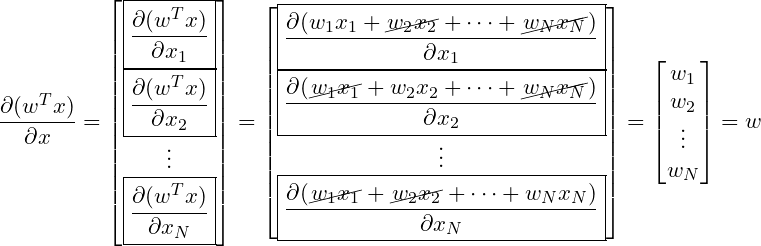

####  (2) 행렬미분법칙 : 이차 형식

- 이차 형식을 미분하면 행렬과 벡터의 곱으로 나타난다.
> $$
\begin{align}
f(x) = x^T A x
\end{align}
$$
<br>
>  $$ 
\begin{align}
\nabla f(x) = \frac{\partial {x}^{T}{A}{x}}{\partial {x}} = ({A} + {A}^{T}){x}
\end{align}
$$

| 스칼라 미분                        | 벡터/행렬미분                           |
|-|-|
| $ax \;\; \rightarrow \;\; a$     | $w^Tx \;\; \rightarrow \;\; w$         |
| $ax^2 \;\; \rightarrow \;\; 2ax$  | $x^TAx \;\; \rightarrow \;\; (A+A^T)x$ |

### 4) 벡터를 스칼라로 미분하는 경우

- 다음의 벡터를 스칼라 $x$로 미분하는 경우, 결과를 행 벡터로 표시함
> $$
\begin{align}
{f}(x) =
\begin{bmatrix}
f_1 \\
f_2 \\
\vdots\\
f_M \\
\end{bmatrix}
\end{align}
$$
<br>
> $$
\begin{align}
\frac{\partial {f}}{\partial x} = 
\begin{bmatrix}
\dfrac{\partial f_1}{\partial x} &
\dfrac{\partial f_2}{\partial x} &
\cdots &
\dfrac{\partial f_M}{\partial x}
\end{bmatrix}
\end{align}
$$

### 5) 벡터를 벡터로 미분하는 경우


- 벡터를 벡터로 미분하면 미분의 결과로 나온 도함수는 2차원 배열 즉, 행렬이 됨.(미분을 당하는 벡터의 원소 & 미분을 하는 벡터의 원소도 여러개 이므로)
> $$
\begin{align}
\dfrac{\partial {f}}{\partial {x}}
= 
\begin{bmatrix}
\dfrac{\partial f_1}{\partial {x}} &
\dfrac{\partial f_2}{\partial {x}} &
\cdots                             & 
\dfrac{\partial f_N}{\partial {x}}
\end{bmatrix}
=
\begin{bmatrix}
\dfrac{\partial {f}}{\partial x_1} \\
\dfrac{\partial {f}}{\partial x_2} \\
\vdots                             \\
\dfrac{\partial {f}}{\partial x_M}
\end{bmatrix}
= 
\begin{bmatrix}
\dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_2}{\partial x_1} & \cdots & \dfrac{\partial f_N}{\partial x_1} \\
\dfrac{\partial f_1}{\partial x_2} & \dfrac{\partial f_2}{\partial x_2} & \cdots & \dfrac{\partial f_N}{\partial x_2} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial f_1}{\partial x_M} & \dfrac{\partial f_2}{\partial x_M} & \cdots & \dfrac{\partial f_N}{\partial x_M} \\
\end{bmatrix}
\end{align}
$$

####  (3) 행렬미분법칙 : 행렬과 벡터의 곱의 미분

- 행렬 $A$와 벡터 $x$의 곱 $Ax$를 벡터 $x$로 미분하면 행렬 $A^T$가 된다.
> $$
\begin{align}
f(x) = Ax
\end{align}
$$
<br>
> $$ 
\begin{align}
\nabla f(x) = \dfrac{\partial ({Ax})}{\partial {x}} = A^T 
\end{align}
$$

- 증명
> $$
\begin{align}
{Ax} = {c_1}x_1 + {c_2}x_2 + \cdots + {c_M}x_M
\end{align}
$$
<br>
> $$
\begin{align}
\dfrac{\partial ({Ax})}{\partial {x}}
=
\begin{bmatrix}
\dfrac{\partial ({Ax})}{\partial x_1} \\
\dfrac{\partial ({Ax})}{\partial x_2} \\
\cdots \\
\dfrac{\partial ({Ax})}{\partial x_M}
\end{bmatrix} 
=
\begin{bmatrix}
\dfrac{\partial ({c_1}x_1 + {c_2}x_2 + \cdots + {c_M}x_M)^T}{\partial x_1} \\
\dfrac{\partial ({c_1}x_1 + {c_2}x_2 + \cdots + {c_M}x_M)^T}{\partial x_2} \\
\cdots \\
\dfrac{\partial ({c_1}x_1 + {c_2}x_2 + \cdots + {c_M}x_M)^T}{\partial x_M}
\end{bmatrix} 
=
\begin{bmatrix}
{c_1}^T \\
{c_2}^T \\
\cdots \\
{c_M}^T
\end{bmatrix} 
= A^T
\end{align}
$$



### 6) 자코비안 행렬
- 자코비안 행렬(Jacobian matrix) : 벡터함수를 벡터변수로 미분해서 생기는 도함수의 행렬(= 전치행렬)
> $$
\begin{align}
Jf(x) = J = \left(\frac{\partial  f}{\partial  x}\right)^T = 
\begin{bmatrix}
\left(\dfrac{\partial f_1}{\partial x}\right)^T \\ \vdots \\ \left(\dfrac{\partial f_M}{\partial x}\right)^T 
\end{bmatrix} =
\begin{bmatrix}
\nabla f_1^T \\  \vdots \\ \nabla f_M^T \\ 
\end{bmatrix} =
\begin{bmatrix}
\dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_N}\\
\vdots & \ddots & \vdots\\
\dfrac{\partial f_M}{\partial x_1} & \cdots & \dfrac{\partial f_M}{\partial x_N} 
\end{bmatrix}
\end{align}
$$

#### 연습 문제 4.4.4

- 다음 함수의 자코비안 행렬을 구하라
> $$ 
\begin{align}
f(x) = 
\begin{bmatrix}
\displaystyle\sum_{i=1}^3 x_i \\
\displaystyle\prod_{i=1}^3 x_i 
\end{bmatrix}
\end{align}
$$

-  답 :
> $$
\begin{align}
f(x) = 
\begin{bmatrix}
x_1 + x_2 + x_3 \\
x_1 x_2 x_3
\end{bmatrix}
\end{align}
$$
<br>
> $$
\nabla f(x)
= 
\begin{bmatrix}
\dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_1}{\partial x_2} & \dfrac{\partial f_1}{\partial x_3} \\
\dfrac{\partial f_2}{\partial x_1} & \dfrac{\partial f_2}{\partial x_2} & \dfrac{\partial f_2}{\partial x_3} 
\end{bmatrix}
= 
\begin{bmatrix}
1 & 1 & 1 \\
x_2 x_3 & x_1 x_3 & x_1 x_2
\end{bmatrix}
$$

### 7) 헤시안 행렬

- 헤시안 행렬(Hessian matrix) : 다변수 함수의 2차 도함수는 그레디언트 벡터를 입력변수 벡터로 미분한 것 (=그레디언트 벡터의 자코비안 행렬의 전치 행렬)
> $$
\begin{align}
Hf(x) = H = J(\nabla f(x))^T
\end{align}
$$
<br>
> $$
\begin{align}
H_{ij} = \dfrac{\partial^2 f}{\partial x_i\,\partial x_j}
\end{align}
$$
<br>
> $$
\begin{align}
H = \begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_N} \\
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_N} \\
  \vdots & \vdots & \ddots & \vdots \\
  \dfrac{\partial^2 f}{\partial x_N\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_N\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_N^2}
\end{bmatrix}
\end{align}
$$
> - 함수가 연속이고 미분가능한 함수라면 헤시안 행렬은 대칭행렬이 된다.

#### 연습 문제 4.4.5

- 다음 함수의 헤시안 행렬을 구하라
> $$ 
\begin{align}
f(x) = \sum_{i=1}^3 x_i^2
\end{align}
$$


-  답 :
> $$
\begin{align}
f(x) = 
\begin{bmatrix}
x^2_1 + x^2_2 + x^2_3
\end{bmatrix}
\end{align}
$$
<br>
> $$
\nabla f(x)
= 
\begin{bmatrix}
\dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_1}{\partial x_2} & \dfrac{\partial f_1}{\partial x_3} \\
\end{bmatrix}
= 
\begin{bmatrix}
2x_1 & 2x_2  & 2x_3
\end{bmatrix}
$$
<br>
> $$ 
Hf(x) = H =
J(\nabla f(x))^T
= 
\begin{bmatrix}
2 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2 \\
\end{bmatrix}
$$

### 8) 스칼라를 행렬로 미분

- 출력변수 $f$ = 스칼라 값 & 입력변수 $X$ = 행렬인 경우 → 도함수 행렬의 모양 = 입력변수 행렬 $X$ 
> $$
\begin{align}
\dfrac{\partial f}{\partial {X}} =
\begin{bmatrix}
\dfrac{\partial f}{\partial x_{1,1}} & \dfrac{\partial f}{\partial x_{1,2}} & \cdots & \dfrac{\partial f}{\partial x_{1,N}}\\
\dfrac{\partial f}{\partial x_{2,1}} & \dfrac{\partial f}{\partial x_{2,2}} & \cdots & \dfrac{\partial f}{\partial x_{2,N}}\\
\vdots & \vdots & \ddots & \vdots\\
\dfrac{\partial f}{\partial x_{M,1}} & \dfrac{\partial f}{\partial x_{M,2}} & \cdots & \dfrac{\partial f}{\partial x_{M,N}}\\
\end{bmatrix}
\end{align}
$$

####  (4) 행렬미분법칙 : 행렬 곱의 대각성분

- 두 정방행렬을 곱해서 만들어진 행렬의 대각성분(trace) = 스칼라. 이 스칼라를 뒤의 행렬로 미분하면 앞의 행렬의 전치행렬이 나온다.
> $$
\begin{align}
f(X) = \text{tr} ({W}{X})
\end{align}
$$
<br>
> $$
\begin{align}
{W} \in {R}^{N \times N}, {X} \in {R}^{N \times N}
\end{align}
$$
<br>
> $$ 
\begin{align}
\dfrac{\partial f}{\partial X} =
\dfrac{\partial \, \text{tr} ({W}{X})}{\partial {X}} = {W}^T
\end{align}
$$

- 증명
> $$
\begin{align}
\text{tr}({W}{X}) = \sum_{i=1}^N \sum_{j=1}^N w_{ji} x_{ij}
\end{align}
$$
<br>
> $$
\begin{align}
\dfrac{\partial \text{tr} ({W}{X})}{\partial x_{ij}} = w_{ji}
\end{align}
$$ 


####  (5) 행렬미분법칙 : 행렬식의 로그

- 행렬식(determinant) = 스칼라 값 & 로그 값 = 스칼라. 이 값을 원래의 행렬로 미분하면 원래 행렬의 역행렬의 전치 행렬이 된다.
> $$
\begin{align}
f(X) = \log | {X} |
\end{align}
$$
<br>
> $$ 
\begin{align}
\dfrac{\partial f}{\partial X} = \dfrac{\partial \log | {X} | }{\partial {X}} = ({X}^{-1})^T 
\end{align}
$$

- 증명
> $$
\begin{align}
\dfrac{\partial}{\partial x_{i,j}} \vert X \vert = C_{i,j}
\end{align}
$$
<br>
>$$
\begin{align}
\dfrac{\partial}{\partial X} \vert X \vert = C = | X | (X^{-1})^T
\end{align}
$$
<br>
> $$
\begin{align}
\dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} = \dfrac{\vert X \vert (X^{-1})^T}{\vert X \vert} = (X^{-1})^T
\end{align}
$$